River Kelly

Kyler Gappa

CSCI-347: Data Mining

Final Project

# Part 2: Implement

In [28]:
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

DATA_COLUMN_NAMES = {
    'mcv': 'Mean Corpuscular Volume',
    'alkphos': 'Alkaline Phosphotase',
    'sgpt': 'Alamine Aminotransferase',
    'sgot': 'Aspartate Aminotransferase',
    'gmmagt': 'Gamma-Glutamyl Transpeptidase',
    'drinks': 'Number of half-pint equivalents of alcoholic beverages drunk per day',
    # 'selector': 'Group' # field used to split data into two sets
}

def getRawDataFromFile(file: str) -> list:
    # check that file exists
    if not os.path.exists(file):
        # file does NOT exist, raise error
        raise RuntimeError(f'File "{file}" does not exist')
    # read file lines
    lines = list()
    with open(file, 'r') as f: lines = f.readlines()
    # get data from file lines
    data = list()
    for line in lines:
        # clean the line string
        line = str(line).strip()
        # if line is empty, skip it
        if line is None or line == "" or len(line) < 1: continue
        line_data = line.split(',')
        line_data.pop(6)
        for data_item_index, data_item in enumerate(line_data):
            if data_item_index in [5]: data_item = float(data_item)
            else: data_item = int(data_item)
            line_data[data_item_index] = data_item
        data.append(line_data)
    return data

In [29]:
from google.colab import drive
drive.mount('/content/drive')

file = "/content/drive/My Drive/347-Data-Mining/Final-Project/data/bupa.data"
RAW_DATA = getRawDataFromFile(file)

drive.flush_and_unmount()

df = pd.DataFrame(data=RAW_DATA, columns=DATA_COLUMN_NAMES.values())

D = np.ndarray(shape=(len(RAW_DATA), len(RAW_DATA[0])), dtype=float)
for i, row in enumerate(RAW_DATA): D[i] = np.array(row)

Mounted at /content/drive


In [30]:
df.head()

,Mean Corpuscular Volume,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Gamma-Glutamyl Transpeptidase,Number of half-pint equivalents of alcoholic beverages drunk per day
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


In [31]:
D.shape

(345, 6)

In [32]:
D

array([[85., 92., 45., 27., 31.,  0.],
       [85., 64., 59., 32., 23.,  0.],
       [86., 54., 33., 16., 54.,  0.],
       ...,
       [98., 77., 55., 35., 89., 15.],
       [91., 68., 27., 26., 14., 16.],
       [98., 99., 57., 45., 65., 20.]])

## PCA

In [86]:
pca = PCA(n_components=2)
pca_transformed_D = pca.fit_transform(D)
pca.explained_variance_ratio_

array([0.71291588, 0.13783074])

In [87]:
D.shape

(345, 6)

In [88]:
pca_transformed_D.shape

(345, 2)

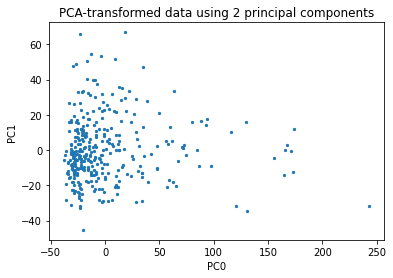

In [90]:
plt.scatter(pca_transformed_D[:, 0], pca_transformed_D[:, 1], s=5)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA-transformed data using 2 principal components')
plt.show()

## Mean Centered PCA

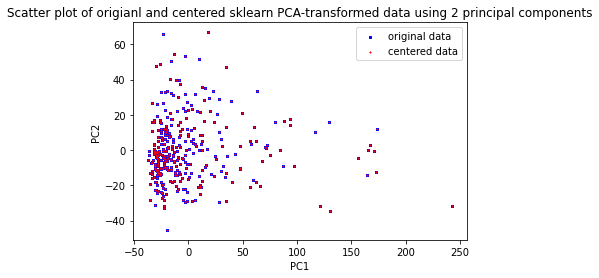

In [96]:
multi_d_mean = np.mean(D, axis=0)
centered_data = D - multi_d_mean

pca = PCA(n_components=2)

pca_transformed_centered_D = pca.fit_transform(centered_data)
pca_transformed_D = pca.fit_transform(D)

plt.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=5, c='b', marker='s', label='original data')
plt.scatter(pca_transformed_centered_D[:,0], pca_transformed_centered_D[:,1], s=1, c='r', marker='x', label='centered data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')
plt.title('Scatter plot of origianl and centered sklearn PCA-transformed data using 2 principal components')
plt.show()

In [97]:
import numpy.linalg as LA

## PCA Centered and 1-dim PCA

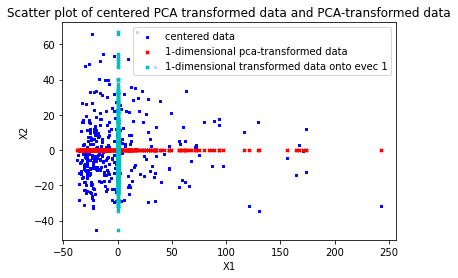

In [93]:
multi_d_mean = np.mean(D, axis=0)
centered_data = D - multi_d_mean

pca = PCA(n_components=2)
pca_transformed_centered_D = pca.fit_transform(centered_data)

Sigma = np.cov(pca_transformed_centered_D.T, ddof=1)
evalues, evectors = LA.eig(Sigma)
# sort
idx = evalues.argsort()[::-1]
evalues = evalues[idx]
evectors = evectors[:, idx]
total_var = sum(np.diag(Sigma))
n = D.shape[0]

coords_along_eig0 = evectors[:,0].T.dot(pca_transformed_centered_D.T)
projected_along_eig0 = np.zeros((n,2))
for i in range(len(coords_along_eig0)):
    projected_along_eig0[i,:] = coords_along_eig0[i] * evectors[:,0]

coords_along_eig1 = evectors[:,1].T.dot(pca_transformed_centered_D.T)
projected_along_eig1 = np.zeros((n,2))
for i in range(len(coords_along_eig1)):
    projected_along_eig1[i,:] = coords_along_eig1[i]*evectors[:,1]

pjdev0 = projected_along_eig0
pjdev1 = projected_along_eig1

plt.scatter(pca_transformed_centered_D[:,0], pca_transformed_centered_D[:,1], s=5, c='b', marker='s', label='centered data')
plt.scatter(pjdev0[:,0], pjdev0[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
plt.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='c', marker='x', label='1-dimensional transformed data onto evec 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of centered PCA transformed data and PCA-transformed data')
plt.legend(loc='upper right')
plt.show()

# Part 3: Report

##Problem Statement

We where hoping to help identify key characteristics that can help show potential signs of liver disorders. 

##Data

This data set had 345 intstances and 7 attributes with no missing values.

All of the attributes in our data were numerical.

##Preprocessing Techniques

To preprocess our data, we used a few techiques. First we one-hot encoded the categorical attributes. We also mean centered our data so that our data results would be standardized between the techiques that require mean centering and those that do not.

##Data Mining Techniques

We used dimensionality reduction to identify which of the attributes has the greatest effect on k-means. We used k-means as it can quickly find special groups of those who have a disorder, who are at a high risk for disorders, and those who are at a low risk for disorders.  It can also show us how greatly an attribute effects the position of a data point when a dimension is reduced.

##Analysis